In [27]:
# Exemplo de Projeto de Observador de Ordem Plena
# Verificação dos estados observados através do sistema expandido

In [28]:
import numpy as np
import sympy as sp
import control
import control.matlab
import math
import cmath
import matplotlib.pyplot as plt
from scipy import linalg

In [29]:
#  Matrizes do Sistema
A = np.matrix('0 500;-25 -100');
B = np.matrix('0; 25');
C = np.matrix('1 0');
D = 0;

# projeto do observador de estados
# Autovalores Desejados
u1 = -1000;
u2 = -1000;

In [30]:
# Matriz de observabilidade

N = np.block([np.conjugate(np.transpose(C)),np.conjugate(np.transpose(A))*np.conjugate(np.transpose(C))]);
                           
# teste de observabilidade
np.linalg.matrix_rank(N)   

2

In [31]:
# Matriz de Ganhos do Observador
Ke = np.transpose(control.acker(np.transpose(A),np.transpose(C),[u1, u2]))
Ke

matrix([[1900.],
        [1595.]])

In [32]:
# Verificação através do sistema expandido

AA = np.block([[A, np.zeros([len(A),len(A)])],[Ke*C, A-Ke*C]]);
BB = np.block([[B],[B]]);
CC = np.eye(2*len(A));
DD = np.zeros([2*len(A),1])

sys = control.ss(AA,BB,CC,DD);
  

In [33]:
tfinal = 0.12;
t = np.linspace(0, tfinal, 1000)                      
t, Y = control.step_response(sys,t);
# separando os elemntos do vetor X
x1 = Y[0,:][0, :]
x2 = Y[1,:][0, :]
x1e = Y[2,:][0, :]
x2e = Y[3,:][0, :]

In [34]:
plt.figure()
plt.plot(t, x1)
plt.xlabel("t")
plt.ylabel("x1(t)")
plt.grid(True)
plt.show()

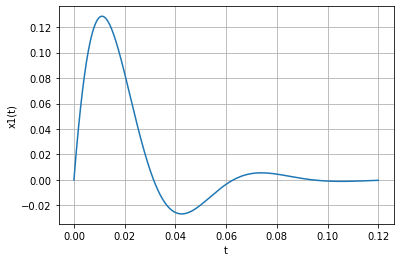

In [35]:
plt.figure()
plt.plot(t, x2)
plt.xlabel("t")
plt.ylabel("x1(t)")
plt.grid(True)
plt.show()

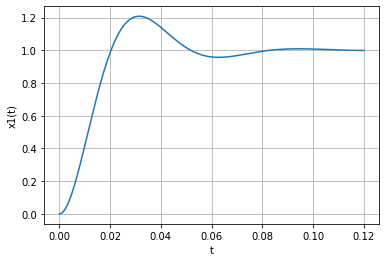

In [36]:
plt.figure()
plt.plot(t, x1e)
plt.xlabel("t")
plt.ylabel("x1(t)")
plt.grid(True)
plt.show()

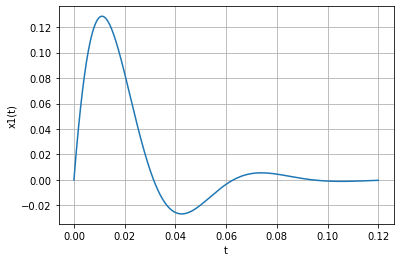

In [37]:
plt.figure()
plt.plot(t, x2e)
plt.xlabel("t")
plt.ylabel("x1(t)")
plt.grid(True)
plt.show()